# HW 1 - Data Wrangling

## Data Cleaning (6 pts)

**Load mpg_left.csv:**
Import the file into a DataFrame using pandas.


*  Import the file into a DataFrame using pandas.
*  Identify and remove any duplicate rows.
*  Identify and remove any rows with null values.

*Note: After these steps, the DataFrame should have the shape (383, 5).*

**Load `mpg_right.csv:**
* Import the file into a separate DataFrame using pandas.
* Identify and remove any duplicate rows.
* Identify any rows with null values and impute these missing values using the mean.

*Note: After these steps, the DataFrame should have the shape (398, 5).*

## Enriching Data (3 pts)

**Join DataFrames:**
* Merge the two DataFrames, ensuring that only the data for vehicles present in both DataFrames is retained.
* Identify and remove any duplicate rows in the merged DataFrame.
* Identify and remove any rows with null values.

*Note: After these steps, the merged DataFrame should have the shape (667, 9).*

## Data Manipulation (3 pts)

**Analysis by Origin:**
* Determine the number of vehicles in the dataset for each origin and provide commentary.
* Calculate each origin's average miles per gallon (mpg) and provide commentary.
* Identify which origin has the lowest average vehicle weight and provide commentary.

## Structuring Data (3 pts)

**Data Transformation:**
* Drop the name and origin columns from the DataFrame.
* Standardize the remaining data and return the standardized DataFrame.
* Normalize the remaining data and return the normalized DataFrame.
* Decide between standardizing, normalizing, or leaving the data as is. Justify your choice and provide commentary.

In [151]:
# import mpg_left.csv and mpg_right.csv
import pandas as pd


mpg_left = pd.read_csv('drive/MyDrive/data_science/mpg_left.csv')
mpg_right = pd.read_csv('drive/MyDrive/data_science/mpg_right.csv')

print(mpg_left)
print('\n')
print(mpg_right)

      mpg  cylinders  horsepower  acceleration                       name
0    18.0        8.0       130.0          12.0  chevrolet chevelle malibu
1    18.0        8.0       130.0          12.0  chevrolet chevelle malibu
2    15.0        8.0       165.0          11.5          buick skylark 320
3    18.0        8.0       150.0          11.0         plymouth satellite
4    16.0        8.0       150.0          12.0              amc rebel sst
..    ...        ...         ...           ...                        ...
401  27.0        4.0        86.0          15.6            ford mustang gl
402  44.0        4.0        52.0          24.6                  vw pickup
403  32.0        4.0        84.0          11.6              dodge rampage
404  28.0        4.0        79.0          18.6                ford ranger
405  31.0        4.0        82.0          19.4                 chevy s-10

[406 rows x 5 columns]


     displacement  weight  model_year  origin                       name
0           3

# Remove Duplicates

In [152]:
# check for duplicate samples
print('Before duplicate removal')
print('mpg_left Duplicates: ', mpg_left.duplicated().sum())
print('mpg_right Duplicates: ', mpg_right.duplicated().sum())

# Remove duplicates
mpg_left.drop_duplicates(inplace=True)
mpg_right.drop_duplicates(inplace=True)

print('After duplicate Removal')
print('mpg_left Duplicates: ', mpg_left.duplicated().sum())
print('mpg_right Duplicates: ', mpg_right.duplicated().sum())

# print shape of both data frames
print('mpg_left shape: ', mpg_left.shape)
print('mpg_right shape: ', mpg_right.shape)

Before duplicate removal
mpg_left Duplicates:  9
mpg_right Duplicates:  5
After duplicate Removal
mpg_left Duplicates:  0
mpg_right Duplicates:  0
mpg_left shape:  (397, 5)
mpg_right shape:  (398, 5)


# Remove/Impute Nulls

In [153]:
# check for missing values
print('mpg_left nulls:')
print(mpg_left.isnull().sum())
print('\nmpg_right nulls:')
print(mpg_right.isnull().sum())

# create dataframe with values that contains nulls to look up after imputing the
# data
mpg_right_nulls = mpg_right[mpg_right.isnull().any(axis=1)]

# remove rows from mpg_left that contain a null in any column
mpg_left = mpg_left.dropna()

# imput columns weight, model_year and displacement in mpg_right with the mean for those columns
weight_mean = round(mpg_right['weight'].mean())
model_year_mean = round(mpg_right['model_year'].mean())
displacement_mean = round(mpg_right['displacement'].mean())

mpg_right['weight'].fillna(weight_mean, inplace=True)
mpg_right['model_year'].fillna(model_year_mean, inplace=True)

# rows that have null in vehicle displacement
displacement_is_null = mpg_right[mpg_right['displacement'].isnull()]

print('displacement_is_null: \n', displacement_is_null)

# I've determined that if the the vehicle displacement is available in another row
# for the given car that value should be used instead of the mean of vehicle displacement
# because displacement is the the total volume of air and fuel that an engine's pistons move in one cycle.[From google]
# This isnt likely to change drastically for the same car only a few years apart
# so calculating the mean for this could lead to bad data

# for every vehicle in displacement_is_null search for name of that vehicle in mpg_right
for index, vehicle in displacement_is_null.iterrows():
  # gets rows that have the same vehicle name in mpg_right
  cars_with_same_name  = mpg_right[mpg_right['name'] == vehicle['name']]
  print('cars_with_same_name: ', cars_with_same_name)
  # set displacement for cars with missing values to the values that the same cars have
  same_cars_with_notnull_displacement = cars_with_same_name[cars_with_same_name['displacement'].notnull()]
  print('same_cars_with_notnull_displacement: ', same_cars_with_notnull_displacement)
  if not same_cars_with_notnull_displacement.empty:
    # insert into mpg_right the displacement for the current vehicle
    mpg_right.loc[index, 'displacement'] = same_cars_with_notnull_displacement.iloc[0]['displacement']

# if no displacement could be found fill with mean
mpg_right['displacement'].fillna(displacement_mean, inplace=True)

# Look at rows that used to have nulls
updated_right_nulls = mpg_right[mpg_right['name'].isin(mpg_right_nulls['name'])]

print('Updated Right Nulls: \n', updated_right_nulls)

print('mpg_left shape: ', mpg_left.shape)
print('mpg_right shape: ', mpg_right.shape)


mpg_left nulls:
mpg             3
cylinders       3
horsepower      9
acceleration    2
name            0
dtype: int64

mpg_right nulls:
displacement    4
weight          4
model_year      4
origin          0
name            0
dtype: int64
displacement_is_null: 
      displacement  weight  model_year  origin                   name
12            NaN  3761.0        70.0     usa  chevrolet monte carlo
130           NaN  2966.0        76.0   japan            datsun b210
191           NaN  4215.0        76.0     usa       ford gran torino
399           NaN  2130.0        82.0  europe              vw pickup
cars_with_same_name:      displacement  weight  model_year origin                   name
12           NaN  3761.0        70.0    usa  chevrolet monte carlo
same_cars_with_notnull_displacement:  Empty DataFrame
Columns: [displacement, weight, model_year, origin, name]
Index: []
cars_with_same_name:       displacement  weight  model_year origin         name
130           NaN  2966.0        

# Enrich data

In [154]:
# inner merge - combines dataset into only shared rows where the names match
merged_vehicle_data = pd.merge(mpg_left, mpg_right, on='name', how='inner')

# check for duplicates
print('merged_vehicle_data Duplicates: ', merged_vehicle_data.duplicated().sum())

# check for missing values
print('merged_vehicle_data nulls:')
print(merged_vehicle_data.isnull().sum())

print('merged_df shape: ', merged_vehicle_data.shape)

# Both dataset have multiple rows for a given name so how does it know which name
# in one dataset maps to the same name in the other dataset? Does it just map to
# the first one that appears in the dataset?

merged_vehicle_data Duplicates:  0
merged_vehicle_data nulls:
mpg             0
cylinders       0
horsepower      0
acceleration    0
name            0
displacement    0
weight          0
model_year      0
origin          0
dtype: int64
merged_df shape:  (667, 9)


# Data Manipulation

In [155]:
# Determine the number of vehicles in the dataset for each origin and provide commentary.
# Calculate each origin's average miles per gallon (mpg) and provide commentary.
# Identify which origin has the lowest average vehicle weight and provide commentary.
#

origin_names_pivot = merged_vehicle_data.pivot_table(values='name', aggfunc='count', index='origin')
print(origin_names_pivot)

# the us produces the majority of vehicles in this dataset while europe produces
# the least

origin_mpg_pivot = merged_vehicle_data.pivot_table(values='mpg', aggfunc='mean', index='origin')
print(origin_mpg_pivot)

# the us vehicles have the lowest mpg average while the japanese vehicles have the
# highest average

origin_weight_pivot = merged_vehicle_data.pivot_table(values='weight', aggfunc='mean', index='origin')
print(origin_weight_pivot)

merged_vehicle_data.head()

# the us vehicles have the highest average weight while the japanese vehicles have
# the lowest

        name
origin      
europe    98
japan    135
usa      434
              mpg
origin           
europe  27.033673
japan   30.322963
usa     19.822811
             weight
origin             
europe  2457.408163
japan   2229.844444
usa     3301.670507


,mpg,cylinders,horsepower,acceleration,name,displacement,weight,model_year,origin
0,18.0,8.0,130.0,12.0,chevrolet chevelle malibu,307.0,3504.0,70.0,usa
1,18.0,8.0,130.0,12.0,chevrolet chevelle malibu,250.0,3329.0,71.0,usa
2,17.0,6.0,100.0,15.5,chevrolet chevelle malibu,307.0,3504.0,70.0,usa
3,17.0,6.0,100.0,15.5,chevrolet chevelle malibu,250.0,3329.0,71.0,usa
4,15.0,8.0,165.0,11.5,buick skylark 320,350.0,3693.0,70.0,usa


# Structuring the data

In [156]:
# Drop the name and origin columns from the DataFrame.
# Standardize the remaining data and return the standardized DataFrame.
# Normalize the remaining data and return the normalized DataFrame.
# Decide between standardizing, normalizing, or leaving the data as is. Justify your choice and provide commentary.

merged_vehicle_data.drop(['name', 'origin'], axis=1, inplace=True)
merged_vehicle_data.head()


,mpg,cylinders,horsepower,acceleration,displacement,weight,model_year
0,18.0,8.0,130.0,12.0,307.0,3504.0,70.0
1,18.0,8.0,130.0,12.0,250.0,3329.0,71.0
2,17.0,6.0,100.0,15.5,307.0,3504.0,70.0
3,17.0,6.0,100.0,15.5,250.0,3329.0,71.0
4,15.0,8.0,165.0,11.5,350.0,3693.0,70.0


In [160]:
from sklearn import preprocessing

# standardize data
standardized_data = preprocessing.scale(merged_vehicle_data)
print(standardized_data)

df_standardized = pd.DataFrame(standardized_data, columns=['mpg', 'cylinders',
                                                             'horsepower', 'acceleration',
                                                           'displacement', 'weight',
                                                           'model_year'])
print(df_standardized.head())

[[-0.68061599  1.52717397  0.71453651 ...  1.10091643  0.66367475
  -1.60505836]
 [-0.68061599  1.52717397  0.71453651 ...  0.54231479  0.44990543
  -1.31865549]
 [-0.81653541  0.32170055 -0.08449532 ...  1.10091643  0.66367475
  -1.60505836]
 ...
 [ 1.22225589 -0.88377287 -0.51064563 ... -0.58468853 -0.81316584
   1.83177607]
 [ 0.67857821 -0.88377287 -0.6438176  ... -0.73168896 -0.41005799
   1.83177607]
 [ 1.08633647 -0.88377287 -0.56391441 ... -0.74148899 -0.29401179
   1.83177607]]
        mpg  cylinders  horsepower  acceleration  displacement    weight  \
0 -0.680616   1.527174    0.714537     -1.311944      1.100916  0.663675   
1 -0.680616   1.527174    0.714537     -1.311944      0.542315  0.449905   
2 -0.816535   0.321701   -0.084495     -0.027025      1.100916  0.663675   
3 -0.816535   0.321701   -0.084495     -0.027025      0.542315  0.449905   
4 -1.088374   1.527174    1.646740     -1.495504      1.522318  0.894546   

   model_year  
0   -1.605058  
1   -1.318655  
2  

In [163]:
# normalize data
normalize_data = preprocessing.MinMaxScaler().fit_transform(merged_vehicle_data)
df_normalize_data =pd.DataFrame(normalize_data, columns=['mpg', 'cylinders',
                                                             'horsepower', 'acceleration',
                                                           'displacement', 'weight',
                                                           'model_year'])
print(df_normalize_data.head())

        mpg  cylinders  horsepower  acceleration  displacement    weight  \
0  0.239362        1.0    0.456522      0.238095      0.617571  0.536150   
1  0.239362        1.0    0.456522      0.238095      0.470284  0.486532   
2  0.212766        0.6    0.293478      0.446429      0.617571  0.536150   
3  0.212766        0.6    0.293478      0.446429      0.470284  0.486532   
4  0.159574        1.0    0.646739      0.208333      0.728682  0.589736   

   model_year  
0    0.000000  
1    0.083333  
2    0.000000  
3    0.083333  
4    0.000000  


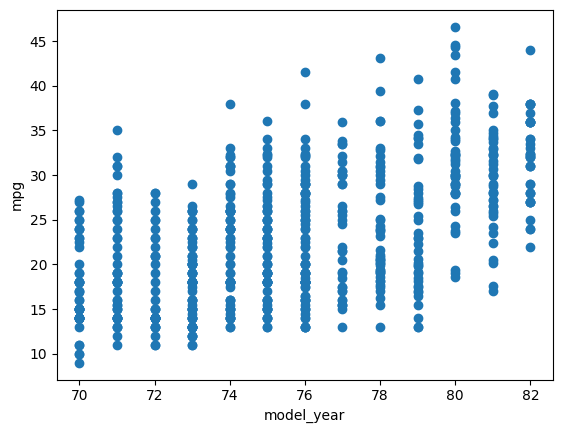

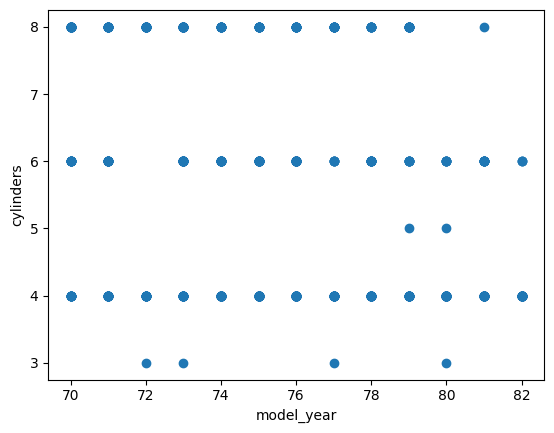

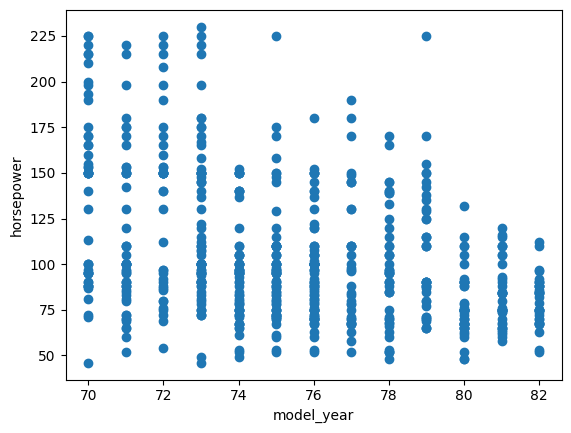

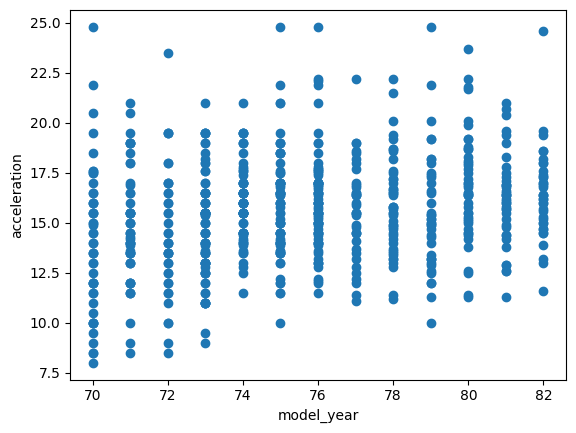

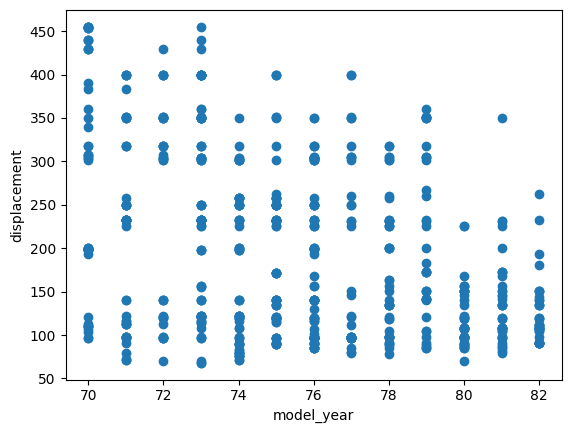

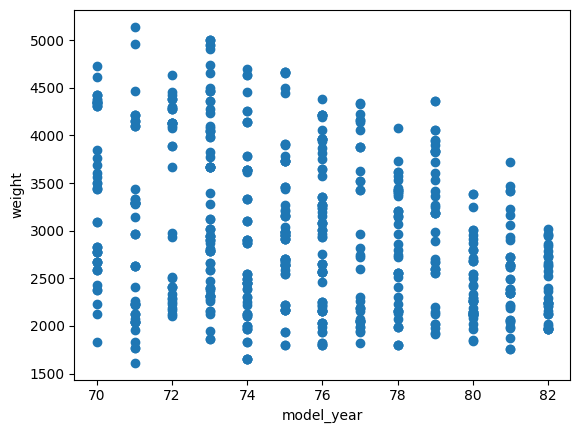

In [170]:
# scatter plots for model_year
# Understanding the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(merged_vehicle_data['model_year'], merged_vehicle_data['mpg'])
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.show()

plt.scatter(merged_vehicle_data['model_year'], merged_vehicle_data['cylinders'])
plt.xlabel('model_year')
plt.ylabel('cylinders')
plt.show()

plt.scatter(merged_vehicle_data['model_year'], merged_vehicle_data['horsepower'])
plt.xlabel('model_year')
plt.ylabel('horsepower')

plt.show()

plt.scatter(merged_vehicle_data['model_year'], merged_vehicle_data['acceleration'])
plt.xlabel('model_year')
plt.ylabel('acceleration')
plt.show()

plt.scatter(merged_vehicle_data['model_year'], merged_vehicle_data['displacement'])
plt.xlabel('model_year')
plt.ylabel('displacement')
plt.show()

plt.scatter(merged_vehicle_data['model_year'], merged_vehicle_data['weight'])
plt.xlabel('model_year')
plt.ylabel('weight')
plt.show()

### Prompt: Decide between standardizing, normalizing, or leaving the data as is. Justify your choice and provide commentary

My Answer: While a lot of the features seem to have a similar scale there are a few outliers in the data and because of that I would choose standardization to capture the reletive scale.